<a href="https://colab.research.google.com/github/PrakashBaire/Churn_Prediction_ANN/blob/main/Churn_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import tensorflow as tf

In [142]:
print(tf.__version__)

2.12.0


In [143]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [145]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [146]:
print(y)

[1 0 1 ... 1 1 0]


In [147]:
#Feature Engineering
#from sklearn.feature_selection import StandardScaler
#sc = StandardScaler()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [148]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [149]:
#Create dummy variables
#geography=pd.get_dummies(X["Geography"],drop_first=True)
#gender=pd.get_dummies(X['Gender'],drop_first=True)

In [150]:
## Concatenate the Data Frames

#X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
#X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [151]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [152]:
# Part 2 - Now let's make the ANN!

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [154]:
# Initialising the ANN
classifier = Sequential()

In [155]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [156]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [157]:
# Adding the Second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [158]:
# Adding the Outout layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [159]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [160]:
classifier.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])

In [161]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [162]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=500, callbacks= Early_Stopping)

Epoch 1/500
536/536 [==============================] - 3s 3ms/step - loss: 0.4715 - accuracy: 0.7942 - val_loss: 0.4336 - val_accuracy: 0.7955
Epoch 2/500
536/536 [==============================] - 2s 3ms/step - loss: 0.4128 - accuracy: 0.8257 - val_loss: 0.3895 - val_accuracy: 0.8395
Epoch 3/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3970 - accuracy: 0.8296 - val_loss: 0.3734 - val_accuracy: 0.8482
Epoch 4/500
536/536 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8349 - val_loss: 0.3673 - val_accuracy: 0.8474
Epoch 5/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.8416 - val_loss: 0.3753 - val_accuracy: 0.8383
Epoch 6/500
536/536 [==============================] - 3s 5ms/step - loss: 0.3825 - accuracy: 0.8369 - val_loss: 0.3743 - val_accuracy: 0.8455
Epoch 7/500
536/536 [==============================] - 3s 5ms/step - loss: 0.3762 - accuracy: 0.8390 - val_loss: 0.3751 - val_accuracy: 0.8455

In [163]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


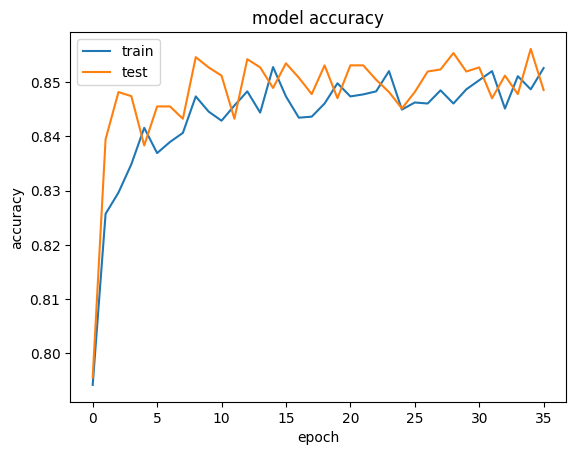

In [164]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

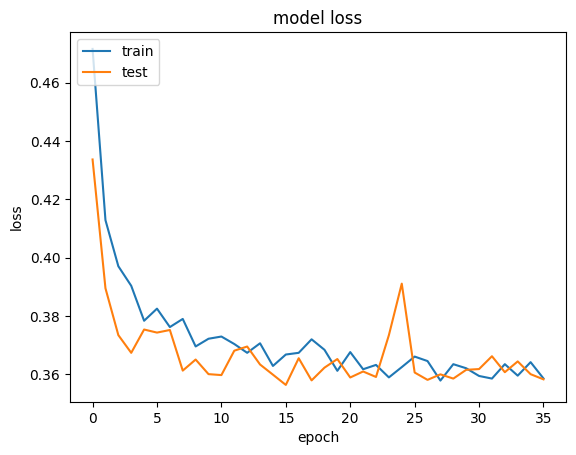

In [165]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [166]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [167]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1556,   39],
       [ 227,  178]])

In [168]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [169]:
score

0.867